In [ ]:
# import the necessary modules

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Loading the data

In [9]:
species = pd.read_csv('species_info.csv')
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [10]:
species.shape

(5824, 4)

In [5]:
observations = pd.read_csv('observations.csv')
observations.head(5)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
observations.shape

(23296, 3)

In [11]:
# exploring the data

In [12]:
print(f'number of unique species: {species.scientific_name.nunique()}')

number of unique species: 5541


In [13]:
print(f'number of unique species: {species.category.nunique()}')


number of unique species: 7


In [14]:
print(f'unique species are: {species.category.unique()}')

unique species are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [15]:
print(f'no of conservation species: {species.conservation_status.nunique()}')
print(f'conservation status are: {species.conservation_status.unique()}')

no of conservation species: 4
conservation status are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [16]:
species.groupby('conservation_status').size().reset_index()


,conservation_status,0
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


In [17]:
conservationStatus_tb = species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservationStatus_tb

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


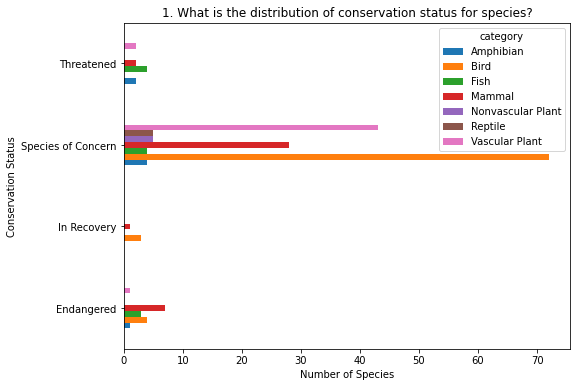

In [19]:
cs_plot = conservationStatus_tb.plot(kind = 'barh', 
                                     figsize=(8,6), 
                                     stacked=False, 
                                     title='1. What is the distribution of conservation status for species?',
                                    legend=True,
                                )

cs_plot.set_ylabel("Conservation Status");
cs_plot.set_xlabel("Number of Species");

In [20]:
species.fillna('No Intervention', inplace=True)


In [21]:
protection_counts= \
            species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


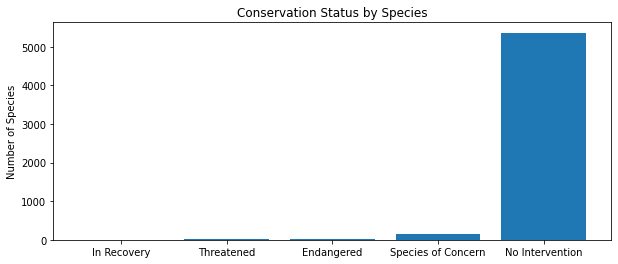

In [22]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.scientific_name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

In [23]:
species['is_protected'] = species.conservation_status != 'No Intervention'

species.head(5)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [24]:
protected_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()

protected_counts.columns = ['category', 'not_protected', 'protected']

protected_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [25]:
protected_counts['% of protected species'] = (protected_counts.protected/ \
                                (protected_counts.protected + protected_counts.not_protected) * 100).round(2)

protected_counts

,category,not_protected,protected,% of protected species
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


In [26]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]

chi2, pval, dof, expected = chi2_contingency(contingency1)
print(pval.round(5))

0.68759


In [27]:
contingency2 = [[30, 146],
               [5, 73]]

chi2, pval, dof, expected = chi2_contingency(contingency2)

print(pval.round(5))

0.03836


In [28]:
contingency3 = [[72, 7],
               [4216, 46]]

chi2, pval, dof, expected = chi2_contingency(contingency3)

print(pval)

1.0441355146657018e-08


In [29]:
y = observations.groupby(['park_name', 'scientific_name'])['observations'].max().reset_index()\
                                                                          .sort_values(by='observations', ascending=False)

y.groupby('park_name').first()

,scientific_name,observations
park_name,,
Bryce National Park,Valerianella radiata,176
Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
Yellowstone National Park,Lycopodium tristachyum,321
Yosemite National Park,Ivesia shockleyi var. shockleyi,223


In [30]:
z = observations.merge(species)

mammal_specis = z[z.category == "Mammal"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,28830
1,Great Smoky Mountains National Park,21056
2,Yellowstone National Park,70701
3,Yosemite National Park,42533


In [31]:
z = observations.merge(species)

mammal_specis = z[z.category == "Fish"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,12823
1,Great Smoky Mountains National Park,9482
2,Yellowstone National Park,31459
3,Yosemite National Park,19137


In [32]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

In [33]:
cleanRows = [list(set(x)) for x in common_Names]

cleanRows[:5]

[['Vole', 'Gappers', 'RedBacked'],
 ['Bison', 'American'],
 ['Cattle', 'Aurochs', 'Domesticated', 'Domestic', 'Feral'],
 ['Red', 'Sheep', 'Mouflon', 'Domestic', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

In [34]:
combinedList = []

for lst in cleanRows:
    for item in lst:
        combinedList.append(item)
        
combinedList[:15]

['Vole',
 'Gappers',
 'RedBacked',
 'Bison',
 'American',
 'Cattle',
 'Aurochs',
 'Domesticated',
 'Domestic',
 'Feral',
 'Red',
 'Sheep',
 'Mouflon',
 'Domestic',
 'Feral']

In [35]:
details = dict((item, combinedList.count(item)) for item in set(combinedList))

df = pd.DataFrame({'Word' : list(details.keys()), 'Count' : list(details.values())}).sort_values(by='Count', ascending=False)

df.head(10)

,Word,Count
38,Bat,23
96,Shrew,18
127,Myotis,17
74,Mouse,16
131,Chipmunk,13
75,Squirrel,12
104,American,12
105,Eastern,11
15,Vole,11
1,Western,10


In [36]:
species['is_bat'] = species.common_names.apply(lambda x: True if 'Bat' in x else False)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [37]:
species[(species.is_bat) & (species.category == 'Mammal')].head(10)


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [38]:
bat_observations = observations.merge(species[(species.is_bat) & (species.category == 'Mammal')])

bat_observations.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
5,Corynorhinus rafinesquii,Great Smoky Mountains National Park,80,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
6,Corynorhinus rafinesquii,Bryce National Park,57,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
7,Corynorhinus rafinesquii,Yellowstone National Park,259,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
8,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
9,Nycticeius humeralis,Bryce National Park,110,Mammal,Evening Bat,No Intervention,False,True


In [39]:
bat_observations.groupby('park_name').observations.sum().reset_index()


,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [40]:
bat_obs_bypark = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

bat_obs_bypark

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


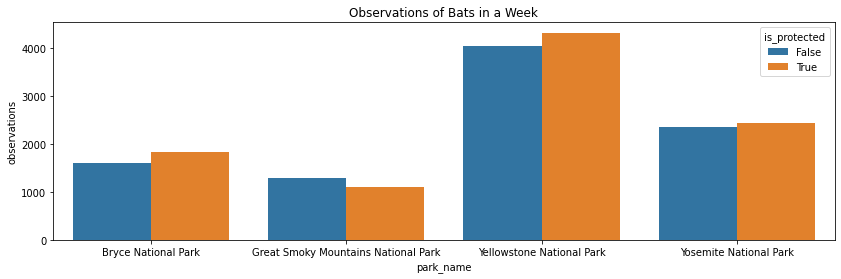

In [41]:
plt.figure(figsize=(14, 4))
sns.barplot(data = bat_obs_bypark, x = 'park_name', y = 'observations', hue = 'is_protected')
plt.title('Observations of Bats in a Week')
plt.show()

In [42]:
str1 = 'Sheep is in this string'
'Sheep' in str1

True

In [43]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

species.head(5)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False


In [44]:
species[species.is_sheep]


,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


In [45]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]

sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


In [46]:
sheep_observations = observations.merge(sheep_species)

sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True


In [47]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()

obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


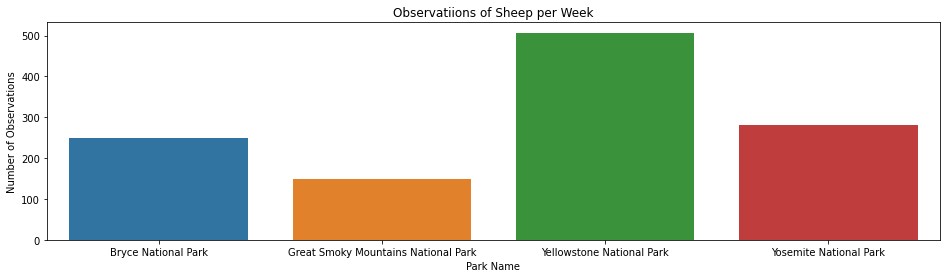

In [48]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
sns.barplot(data = obs_by_park, x = 'park_name', y = 'observations')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Observatiions of Sheep per Week')
plt.show()

In [49]:
min_detectable_effect = (15 - 10) / 15 * 100
min_detectable_effect

33.33333333333333

In [50]:
#cause in Bryce National Park we observe 250 sheeps per week, in order to reach to 870 we need 870/250 weeks:
Number_of_weeks_Bryce = 870/250

Number_of_weeks_Bryce

3.48

In [51]:
#cause in Yellowstone Park we observe 250 sheeps per week, in order to reach to 870 we need 870/250 weeks:
Number_of_weeks_Yellowstone = 870/507

Number_of_weeks_Yellowstone

1.7159763313609468

*The most spotted species in Bryce National Park is Valerianella radiata.
*The most spotted species in Great Smoky Mountains National Park is Sonchus asper ssp. asper.
*The most spotted species in Yellowstone National Park is Lycopodium tristachyum.
*The most spotted species in Yosemite National Park is Ivesia shockleyi var. shockleyi.
*Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of mammals.
*Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of fish.
*Yellowstone National Park has the largest number of bats observations by 8362 and Great Smoky Mountains National Park has the lowest bats with 2411.
*The most spotted sheeps in Yellowstone National Park (507). The lower observed sheeps in Great Smoky Mountains National Park (149).
*In addition we was able to find out: total number of unique species; names and number of categories, together with number of species in each category; analyze different tables and columns; create new table with specific values and many more.
*Plotted distribution of conservation status; observations of Bats; and observatiions of Sheep.